# Results Evaluation

In [1]:
%run ../scripts/load_df_for_analysis.py

In [2]:
%run ../scripts/data_visualisations.py

In [3]:
%run ../scripts/df_calculations.py

## Overall model results

### Comparison of best GPT and best Llama Model (from tested models on this data): <br>GPT 4.1 vs. Llama 3.1:70b

In [4]:
chunking = "1024_20"
only_text = True
model = "gpt-4.1-2025-04-14"
df_gpt = load_df_for_analysis(chunking, only_text, model)
results_gpt = eval_predictions(df_gpt, include_relabelled_partially=True)
results_gpt_no_partially = eval_predictions(df_gpt, include_relabelled_partially=False)

In [5]:
chunking = "256_20"
only_text = True
model = "llama3.1.70b"
df_llama = load_df_for_analysis(chunking, only_text, model)
results_llama = eval_predictions(df_llama, include_relabelled_partially=True)
results_llama_no_partially = eval_predictions(df_llama, include_relabelled_partially=False)

In [6]:
results_llama_no_partially

{'G (Total)': 233,
 'P (Substantiated)': 126,
 'N (Unsubstantiated)': 107,
 'TP': 95,
 'FP': 8,
 'TN': 99,
 'FN': 31,
 'accuracy': 0.833,
 'precision': 0.922,
 'recall': 0.754,
 'specificity': 0.925,
 'f1_score': 0.83,
 'invalid_labels': {'Unsubstantiated': [], 'Substantiated': []}}

In [7]:
model_results = {
    "GPT-4.1": results_gpt,
    "Llama 3.1:70b": results_llama,
}

model_results_no_partially = {
    "GPT-4.1": results_gpt_no_partially,
    "Llama 3.1:70b": results_llama_no_partially
}

display_model_results_table(model_results)
display_model_results_table(model_results_no_partially)

,Accuracy,Precision,Recall,Specificity,F1_score
Model,,,,,
GPT-4.1,0.858,0.844,0.902,0.809,0.872
Llama 3.1:70b,0.822,0.893,0.758,0.896,0.820


,Accuracy,Precision,Recall,Specificity,F1_score
Model,,,,,
GPT-4.1,0.876,0.865,0.913,0.832,0.888
Llama 3.1:70b,0.833,0.922,0.754,0.925,0.830


In [8]:
preds_results = {
    "GPT-4.1": get_preds_results(results_gpt),
    "Llama 3.1:70b": get_preds_results(results_llama)
}

preds_results_no_partially = {
    "GPT-4.1": get_preds_results(results_gpt_no_partially),
    "Llama 3.1:70b": get_preds_results(results_llama_no_partially)
}

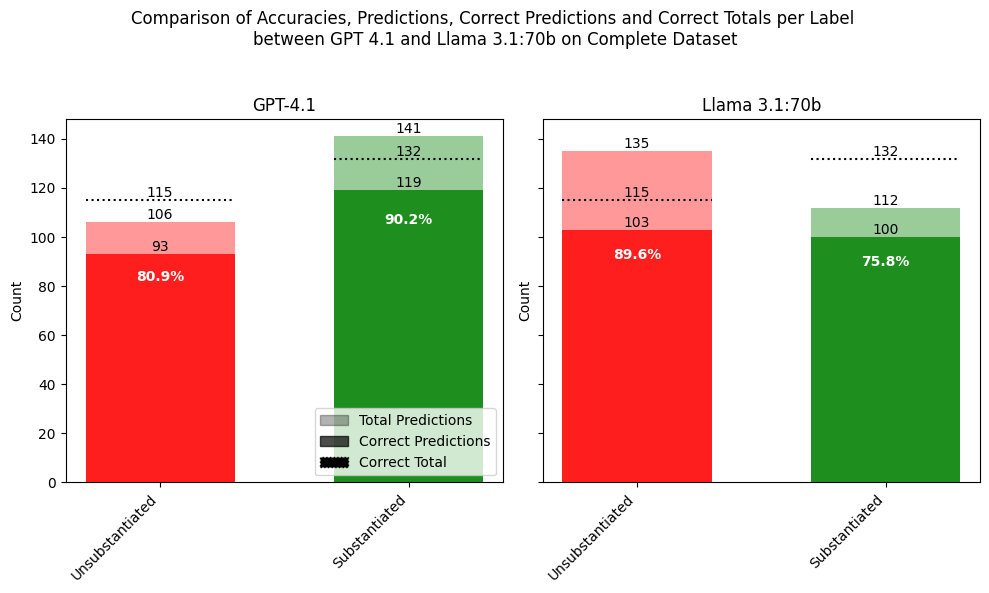

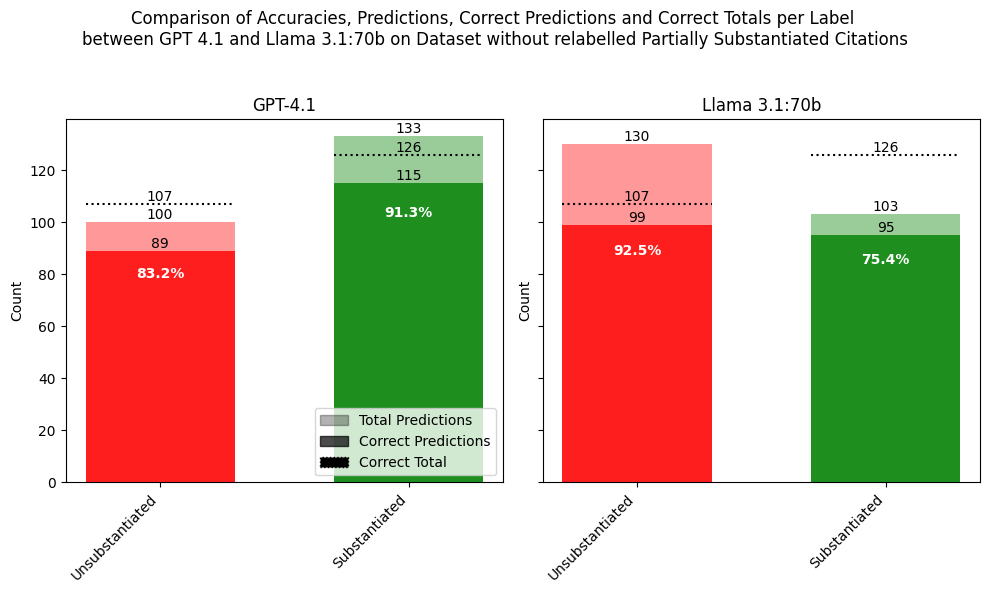

In [9]:
title = "Comparison of Accuracies, Predictions, Correct Predictions and Correct Totals per Label \nbetween GPT 4.1 and Llama 3.1:70b on Complete Dataset"
show_preds_vs_correct_preds_vs_total(list(preds_results.values()), list(preds_results.keys()), title=title, labels=['Unsubstantiated', 'Substantiated'], smaller_figures=True)

title = "Comparison of Accuracies, Predictions, Correct Predictions and Correct Totals per Label \nbetween GPT 4.1 and Llama 3.1:70b on Dataset without relabelled Partially Substantiated Citations"
show_preds_vs_correct_preds_vs_total(list(preds_results_no_partially.values()), list(preds_results.keys()), title=title, labels=['Unsubstantiated', 'Substantiated'], smaller_figures=True)